# Boosted Decision Tree Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.linear
import mltools.transforms as xform

np.random.seed(0)
%matplotlib inline

In [2]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [3]:
X.shape

(200000, 14)

In [4]:
Y.shape

(200000,)

In [5]:
# Xs, Ys = X[:2000], Y[:2000]
# Xtr, Xva, Ytr, Yva = ml.splitData(Xs,Ys, .75)
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, .75)

In [58]:
boosts = []
n_boosts = 100

Ytr_ = np.copy(Ytr)  # We're going to copy the data into a new variable.

for i in range(n_boosts):
    tree = ml.dtree.treeRegress(Xtr, Ytr_, maxDepth=1)
    boosts.append(tree)
    # Now "learning" from our mistakes.
    Ytr_ -= tree.predict(Xtr)

In [59]:
class BoostedTree(ml.base.classifier):
    def __init__(self, learners):
        self.learners = learners
    
    def predict(self, X):
        preds = [self.learners[l].predict(X) for l in range(len(self.learners))]
        return np.sum(preds, axis=0)

In [63]:
train_auc = np.zeros((99))
validation_auc = np.zeros((99))
for i in range(0,99):
    bt = BoostedTree(boosts[:i+1])
    bt.classes = np.unique(Y)
    train_auc[i] = bt.auc(Xtr, Ytr)
    validation_auc[i] = bt.auc(Xva, Yva)

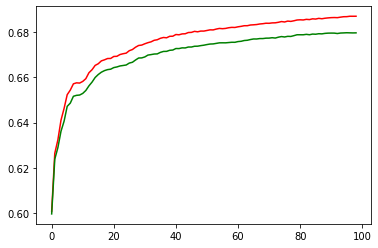

In [64]:
plt.plot(train_auc,'r-',validation_auc,'g-')
plt.show()

In [65]:
print(validation_auc[-5])
print(validation_auc[-1])

0.6796103320494208
0.6796342661892174


In [ ]:
# Create the data for submission by taking the P(Y=1) column from probs and just add a running index as the first column.
Y_sub = np.vstack([np.arange(Xte.shape[0]), probs[:, 1]]).T

# We specify the header (ID, Prob1) and also specify the comments as '' so the header won't be commented out with
# the # sign.
np.savetxt('data/Y_sub.txt', Y_sub, '%d, %.5f', header='ID,Prob1', comments='', delimiter=',')

In [65]:
boosts = []
n_boosts = 20

Ytr_ = np.copy(Ytr)  # We're going to copy the data into a new variable.

for i in range(n_boosts):
    tree = ml.dtree.treeClassify(Xtr, Ytr_, maxDepth=1)
    boosts.append(tree)
    # Now "learning" from our mistakes.
    Ytr_ -= tree.predictSoft(Xtr)[:,1]

In [66]:
class BoostedTree(ml.base.classifier):
    def __init__(self, learners):
        self.learners = learners
    
    def predictSoft(self, X):
        preds = [self.learners[l].predictSoft(X) for l in range(len(self.learners))]
        return np.sum(preds, axis=0)

In [68]:
train_auc = np.zeros((19))
validation_auc = np.zeros((19))
for i in range(1,19):
    bt = BoostedTree(boosts[1:i+1])
    bt.classes = np.unique(Y)
    train_auc[i] = bt.auc(Xtr, Ytr)
    validation_auc[i] = bt.auc(Xva, Yva)

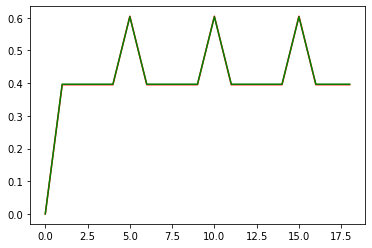

In [69]:
plt.plot(train_auc,'r-',validation_auc,'g-')
plt.show()

In [37]:
## TEST

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
train_auc = np.zeros((15))
validation_auc = np.zeros((15))
for i in range(15):
    bgc = GradientBoostingClassifier(n_estimators=i, max_depth=1)
    bgc.fit(Xtr, Ytr)

In [38]:
test = np.zeros((5,3))
polytest = ml.transforms.fpoly(test, 3, bias=False)